In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#import decartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [29]:
path = "Rat_Sightings.csv"
df = pd.read_csv(path, low_memory=False)

df = df[["Created Date", "Closed Date", "Location Type", "Incident Zip", "Incident Address", "City", "Borough", "Latitude", "Longitude", "Location"]]
display(df)

df['Location Type'].unique()

df['Borough'].unique()


,Created Date,Closed Date,Location Type,Incident Zip,Incident Address,City,Borough,Latitude,Longitude,Location
0,09/03/2018 12:21:09 PM,09/14/2018 05:46:05 PM,3+ Family Apt. Building,11229.0,1213 AVENUE U,BROOKLYN,BROOKLYN,40.598479,-73.959684,"(40.598478991333735, -73.9596835550102)"
1,10/01/2021 06:36:43 PM,NaN,Other (Explain Below),11222.0,NASSAU AVENUE,NaN,BROOKLYN,40.725616,-73.944497,"(40.72561631687134, -73.94449701211244)"
2,07/12/2018 10:17:56 PM,07/24/2018 02:38:39 PM,Vacant Lot,10009.0,600 EAST 13 STREET,NEW YORK,MANHATTAN,40.728716,-73.978485,"(40.72871553527489, -73.97848545954511)"
3,07/12/2018 09:37:14 AM,07/16/2018 04:27:49 PM,1-2 Family Dwelling,11416.0,101-45 103 STREET,Ozone Park,QUEENS,40.685639,-73.839738,"(40.68563941599227, -73.83973845918783)"
4,07/15/2018 03:00:10 PM,07/18/2018 03:46:44 PM,3+ Family Mixed Use Building,11216.0,1180 BEDFORD AVENUE,BROOKLYN,BROOKLYN,40.683790,-73.954007,"(40.68379029014929, -73.95400727877036)"
...,...,...,...,...,...,...,...,...,...,...
207116,10/17/2022 06:51:48 PM,NaN,Other (Explain Below),11237.0,HARMAN STREET,NaN,BROOKLYN,NaN,NaN,NaN
207117,09/08/2022 11:07:07 AM,09/08/2022 11:07:07 AM,3+ Family Apt. Building,11207.0,99 ELDERT STREET,BROOKLYN,BROOKLYN,40.687650,-73.912170,"(40.687649815774954, -73.91217029761194)"
207118,10/24/2022 12:58:05 PM,NaN,Other (Explain Below),11221.0,1019 PUTNAM AVENUE,BROOKLYN,BROOKLYN,40.687466,-73.920240,"(40.687466302829804, -73.92024026550061)"
207119,10/24/2022 06:11:50 PM,NaN,3+ Family Apt. Building,11367.0,147-51 72 ROAD,FLUSHING,QUEENS,40.726712,-73.819064,"(40.72671169487806, -73.81906380734883)"


array(['BROOKLYN', 'MANHATTAN', 'QUEENS', 'BRONX', 'STATEN ISLAND',
       'Unspecified', nan], dtype=object)

Text(0.5, 1.0, 'NYC Rat Incident Heatmap')

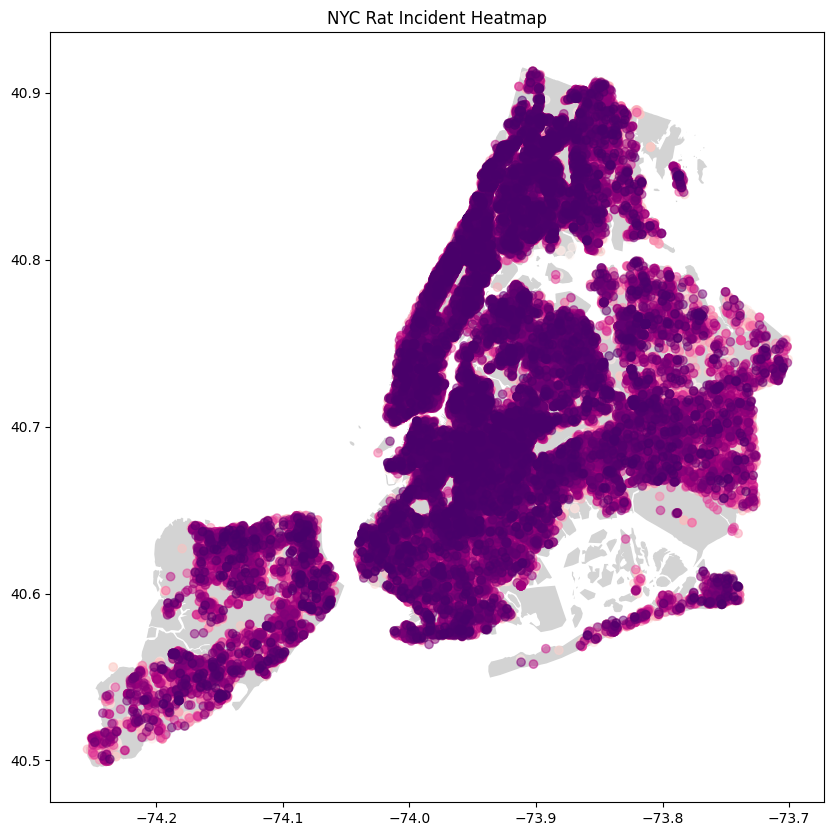

In [3]:
street_map = gpd.read_file("nyu_2451_34490")

geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
geo_df = gpd.GeoDataFrame(df, 
                          crs = ('EPSG:4326'), 
                          geometry = geometry)

fig, ax = plt.subplots(figsize = (10,10))
street_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
geo_df.plot(ax=ax, cmap = 'RdPu', alpha = .5)

ax.set_title('NYC Rat Incident Heatmap')

In [39]:
df['Location Type'] = df['Location Type'].replace(dict.fromkeys(['3+ Family Apt. Building','3+ Family Apartment Building','Apartment','3+ Family Apt.', '3+Family Apt.', '3+ Family Apt'], 'Apartment Building'))
df['Location Type'] = df['Location Type'].replace(dict.fromkeys(['1-3 Family Mixed Use Building', '1-2 Family Mixed Use Building', '3+ Family Mixed Use Building'], 'Mixed Use Building'))

df['Location Type'] = df['Location Type'].replace(dict.fromkeys(['1-2 FamilyDwelling', '1-3 Family Dwelling', '1-2 Family Dwelling'], 'Family Dwelling'))
df['Location Type'] = df['Location Type'].replace(dict.fromkeys(['Restaurant/Bar/Deli/Bakery', 'Store', 'Commercial Building', 'Catering Service', 'Retail Store', 'Restaurant', 'Grocery Store'], 'Commercial Property'))
df['Location Type'] = df['Location Type'].replace(dict.fromkeys(['Abandoned Building', 'Vacant Building', 'Vacant Lot'], 'Vacant Lot/Property'))
df['Location Type'] = df['Location Type'].replace(dict.fromkeys(['Street Fair Vendor', 'Ground', 'Street Area'], 'Street'))
df['Location Type'] = df['Location Type'].replace(dict.fromkeys(['Summer Camp', 'Cafeteria - Public School', 'School/Pre-School'], 'School'))
df['Location Type'] = df['Location Type'].replace(dict.fromkeys(['Residential Property','Residence','Private House','Single Room Occupancy (SRO)','Mixed Use Building', 'Family Dwelling', 'Apartment Building'], 'Residential Building'))
df['Location Type'] = df['Location Type'].replace(dict.fromkeys(['Other (Explain Below)'], 'Other'))
df['Location Type'].unique()

array(['Residential Building', 'Other', 'Vacant Lot/Property',
       'Commercial Property', 'Catch Basin/Sewer', 'Public Garden',
       'Construction Site', 'Parking Lot/Garage', 'Day Care/Nursery',
       'Street', 'Hospital', 'School', 'Government Building',
       'Public Stairs', 'Building (Non-Residential)', 'Office Building',
       nan, 'Beach'], dtype=object)

<AxesSubplot: >

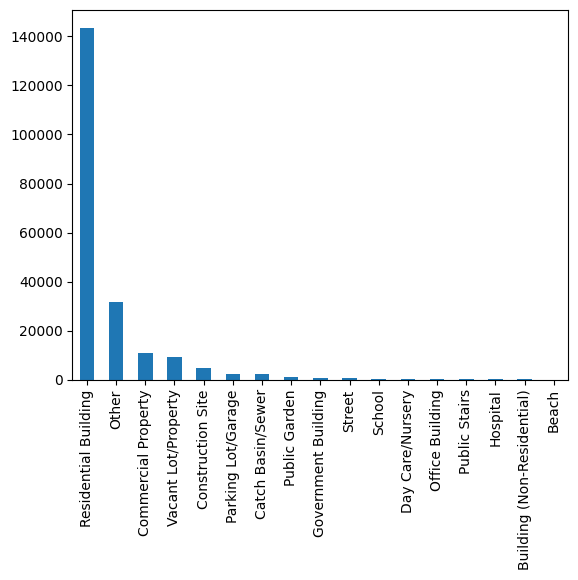

In [49]:
df['Location Type'].value_counts().plot(kind='bar')